# Create ENSO climatology from 1836 - 2015

In [1]:
import xarray as xr

## Read in SST/land skin temperature files from 20th Century Reanalysis V3 database

In [2]:
ds_mean = xr.open_dataset('/home/scratch/20CR_v3/climos/skint_mean_dayofyear_1979_2015.nc') # Read in daily mean skin temps
ds_stdev = xr.open_dataset('/home/scratch/20CR_v3/climos/skint_stdev_dayofyear_1979_2015.nc') # Read in standard deviations
ds_actual = xr.open_dataset('/home/scratch/20CR_v3/daily_skt_1836_2015.nc') # Read in 3-hourly SST/land skin temp

### Calculate daily ENSO standardized anomalies from daily means for Niño 3.4 region

In [3]:
#mean_skint = ds.groupby('time.dayofyear').mean(dim = 'time')
mean_climo_skint = ds_mean.skt.sel(lat=slice(-5, 5), lon=slice(190, 240)).mean(dim = 'lat').mean(dim='lon') # Calculate mean climo using daily means, slice for Niño 3.4 and take mean along lat/lon dims
stdev_climo_skint = ds_stdev.skt.sel(lat=slice(-5, 5), lon=slice(190, 240)).mean(dim = 'lat').mean(dim='lon') # Calculate st dev, slice for Niño 3.4
mean_actual_skint = ds_actual.skt.sel(lat=slice(-5, 5), lon=slice(190, 240)).mean(dim = 'lat').mean(dim='lon') # Calculate mean climo using 3-hourly data, sliced for Niño 3.4
stda_skint_actual = ((mean_actual_skint.groupby('time.dayofyear') - mean_climo_skint) / stdev_climo_skint) # Standardize 
#std_skint = ds.groupby('time.dayofyear').std(dim = 'time')
#stda_skint_actual.sel(dayofyear=30).plot()

In [4]:
stda_skint_actual.sel(dayofyear=4)
stda_skint_actual

<xarray.DataArray 'skt' (time: 65744, dayofyear: 366)>
array([[-0.3433278 , -0.3480216 , -0.34821495, ..., -0.30944756,
        -0.31578937, -0.53628635],
       [-0.35535374, -0.36021197, -0.3604121 , ..., -0.32028675,
        -0.3268507 , -0.5550712 ],
       [-0.36915916, -0.37420613, -0.37441406, ..., -0.33272985,
        -0.3395488 , -0.5766356 ],
       ...,
       [ 2.3994484 ,  2.4322526 ,  2.433604  , ...,  2.1626663 ,
         2.206988  ,  3.7479968 ],
       [ 2.3796158 ,  2.4121487 ,  2.4134889 , ...,  2.144791  ,
         2.188746  ,  3.7170177 ],
       [ 2.3621366 ,  2.3944304 ,  2.3957608 , ...,  2.1290364 ,
         2.172669  ,  3.6897147 ]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1836-01-01 1836-01-02 ... 2015-12-31
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366

### Create rolling standardized anomalies

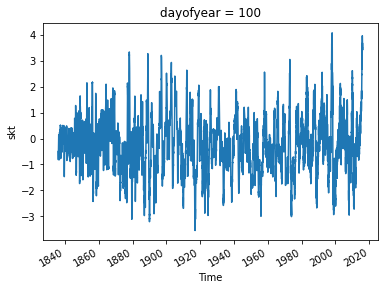

In [7]:
rolling_skint_std = stda_skint_actual.rolling(dayofyear=30).mean() # Calculate rolling standardized anomalies over 1-month periods
rolling_skint_std.sel(dayofyear=100).plot()